<a href="https://colab.research.google.com/github/namans-git/iit_intern/blob/main/T_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Hypothesis Testing

Hypothesis testing is the other domain of statistical inference (besides parameter estimation) wherein we use data from samples to draw conclusions about a population parameter or a probability distribution.

A tentative assumption is made about the parameter or the distribution. This assumption is called the **Null Hypothesis** and is denoted by $H_0$. An **Alternative Hypothesis** (denoted $H_a$), which is the opposite of what is stated in the null hypothesis, is then defined.

The hypothesis-testing procedure involves using sample data to determine whether or not $H_0$ can be rejected. If $H_0$ is rejected, the statistical conclusion is that the alternative hypothesis $H_a$ is true.

A concept known as the **P-value** provides a convenient basis for drawing conclusions in hypothesis-testing applications. The p-value is a measure of how likely the sample results are, assuming the null hypothesis is true; the smaller the p-value, the less likely the sample results.

If the p-value is less than $\alpha$ the null hypothesis can be rejected; otherwise, the null hypothesis cannot be rejected. The p-value is often called the observed level of significance for the test [20].

---


**What are T tests?**

A t-test tells us how significantly different the means of two (or more) groups are.
It is often used in **hypothesis testing** to determine whether a process or treatment actually has an effect on the population of interest, or whether two groups are different from one another.

---
---


There are three types of t-tests:

1. ***Independent Samples T-test***: This test is used to compare the averages or means for two groups.

2. ***Paired Sample T-test***: This test is used to compare means from the same group at different times (For example, one year apart).

3. ***One Sample T-test***: This test is used to test the mean of a single group against an acknowledged mean.

##### Part 1: Data Exploration

In [ ]:
#pip install researchpy

In [ ]:
#importing libraries
import pandas as pd
import researchpy as rp
import scipy.stats as stats
import matplotlib.pyplot as plt

In [ ]:
#importing data
# dataset [21]
df = pd.read_csv("https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   patient    120 non-null    int64 
 1   sex        120 non-null    object
 2   agegrp     120 non-null    object
 3   bp_before  120 non-null    int64 
 4   bp_after   120 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 4.8+ KB


In [ ]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


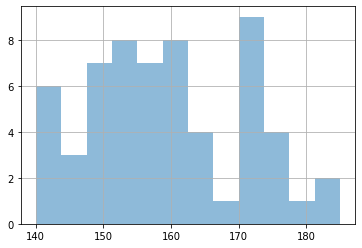

In [ ]:
#the two groups that we will be testing

#group1 = the blood pressure of males before treatment
df.loc[df['sex']=='Male']['bp_before'].hist(bins=12, alpha=0.5)

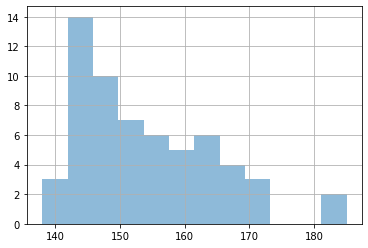

In [ ]:
#group2 = the blood pressure of females before treament
df.loc[df['sex']=='Female']['bp_before'].hist(bins=12, alpha=0.5)

In [ ]:
#####

***Assumption Check:***

There are parametric assumptions that need to met in order for the test to be considered valid.




---



Assumption 1:

***THE TWO SAMPLES ARE INDEPENDENT***:


This assumption is tested when the study is designed. What this means is that no individual has data in group A and B. Since our groups are divided by gender, we've already cleared this assumption.



Assumption 2:

***POPULATION DISTRIBUTIONS ARE NORMAL***


When the sample isn't very large we can use the **shapiro-wilk** test to test the normality of the samples.

In [ ]:
sampling_difference = df['bp_after'][df['sex'] == 'Male'].values - \
                      df['bp_after'][df['sex'] == 'Female'].values

stats.shapiro(sampling_difference)#gives us (W test statistic, p-value)

ShapiroResult(statistic=0.98586106300354, pvalue=0.7147841453552246)

Since the test is **not significant** it indicates the sampling distribution is **normally distributed**.

For larger samples, we should check the normality visually. It is so because as the sample size increases the test's ability to reject the null hypothesis decreases i.e. it gains the power to detect smaller differences as the sample size 𝑛 increases.

--

one method of visually checking the distribution is to use the **probability plot** with or without the correlation value,**R-SQ**, to assess the observed values correlation with the theoretical distribution in question - in the current case it would be the **Gaussian** (a.k.a the normal) distribution.

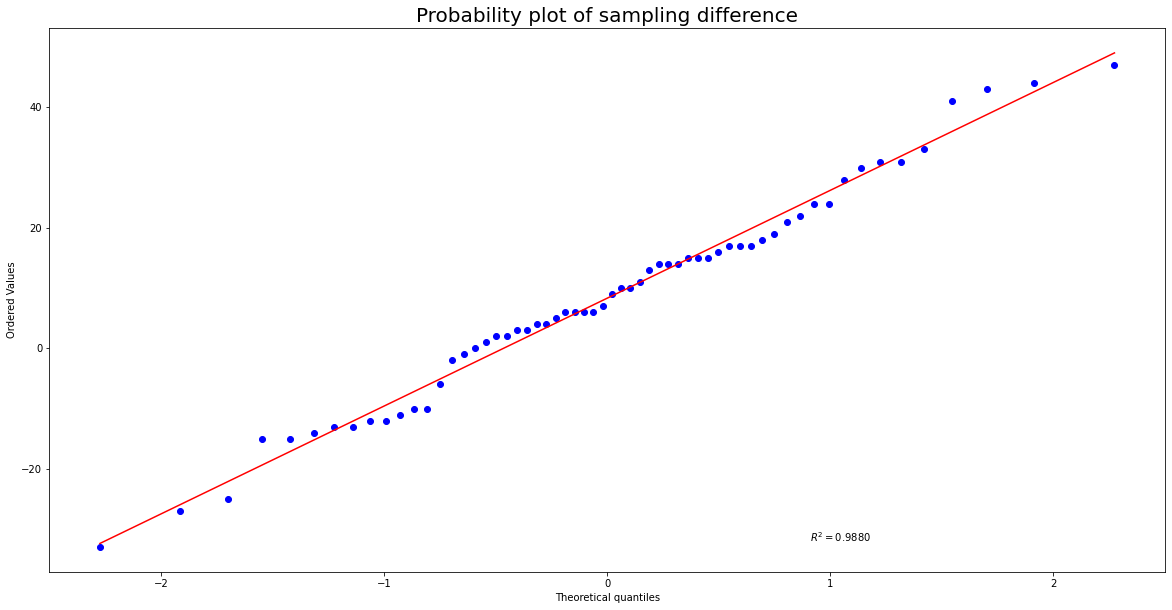

In [ ]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot= plt, rvalue= True)
ax.set_title("Probability plot of sampling difference", fontsize= 20)
ax.set

plt.show()

Both methods support the same finding which is that the sampling distribution is normally distributed.

--

Assumption 3:

***HOMOGENEITY OF VARIANCE***

One of the assumptions is that both groups have equal variances. We can use the **Levene's test** of homogeneity of variances.

In [ ]:
stats.levene(df['bp_after'][df['sex'] == 'Male'],
             df['bp_after'][df['sex'] == 'Female'],
             center= 'mean')

LeveneResult(statistic=5.865854141268659, pvalue=0.01695904277978066)

This test is significant which indicates that the groups have different variances and that the t test may not be the best method to use. We can check again visually.

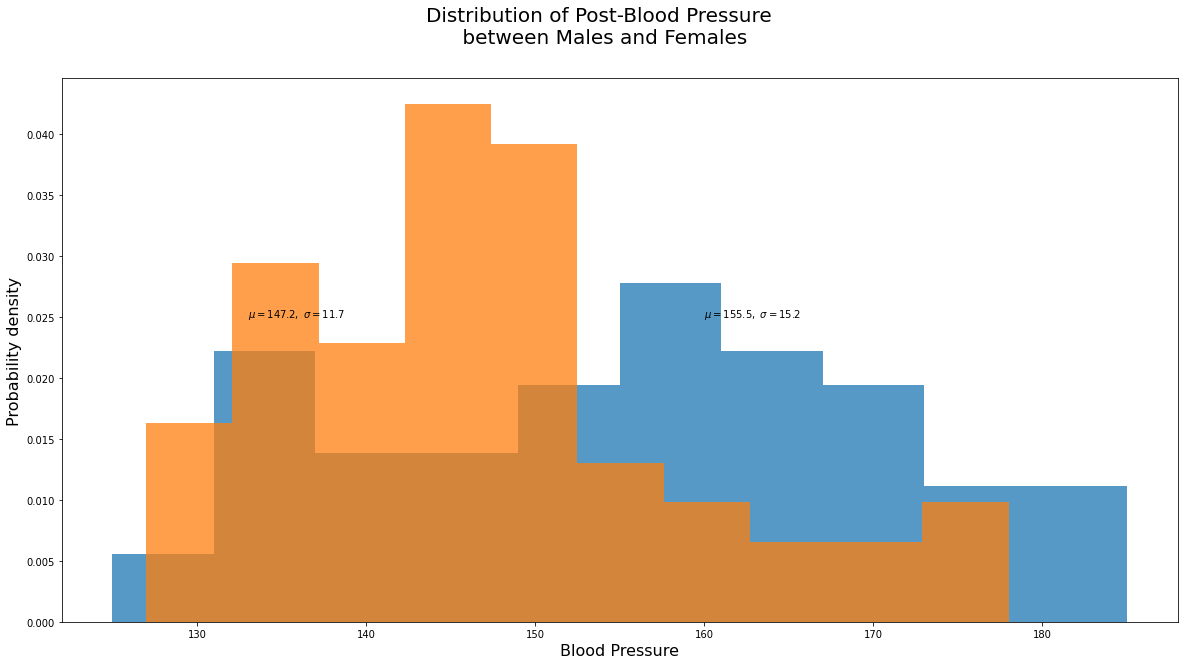

In [ ]:
fig = plt.figure(figsize= (20, 10))
ax = fig.add_subplot(111)


p_bp_male = plt.hist(df['bp_after'][df['sex'] == 'Male'], label= "Male",
                     density= True,
                     alpha=0.75)
p_bp_female = plt.hist(df['bp_after'][df['sex'] == 'Female'], label= "Female",
                       density= True,
                       alpha=0.75)


plt.suptitle("Distribution of Post-Blood Pressure \n between Males and Females", fontsize= 20)
plt.xlabel("Blood Pressure", fontsize= 16)
plt.ylabel("Probability density", fontsize= 16)

plt.text(133, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Female'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Female'].std(): .1f}$")
plt.text(160, .025,
         f"$\mu= {df['bp_after'][df['sex'] == 'Male'].mean(): .1f}, \ \sigma= {df['bp_after'][df['sex'] == 'Male'].std(): .1f}$")


plt.show()

There are different ways to handle **heteroskedasticity** (unequal variance). Some options include, but is not limited to, transforming the dependent variable (outcome), using trimmed means, robust standard errors, or a parametric test suchs as the Welch's t-test.

We'll run a normal t test nonetheless.

In [ ]:
rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
         group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")

(   Variable      N        Mean         SD        SE   95% Conf.    Interval
 0      Male   60.0  155.516667  15.243217  1.967891  151.578926  159.454407
 1    Female   60.0  147.200000  11.742722  1.515979  144.166533  150.233467
 2  combined  120.0  151.358333  14.177622  1.294234  148.795621  153.921046,
               Independent t-test   results
 0  Difference (Male - Female) =     8.3167
 1          Degrees of freedom =   118.0000
 2                           t =     3.3480
 3       Two side test p value =     0.0011
 4      Difference < 0 p value =     0.9995
 5      Difference > 0 p value =     0.0005
 6                   Cohen's d =     0.6112
 7                   Hedge's g =     0.6074
 8              Glass's delta1 =     0.5456
 9            Point-Biserial r =     0.2945)

In [ ]:
summary, results = rp.ttest(group1= df['bp_after'][df['sex'] == 'Male'], group1_name= "Male",
                            group2= df['bp_after'][df['sex'] == 'Female'], group2_name= "Female")

**Interpretation**:

The average blood pressure after the treatment for males, M= 155.5 (151.6, 159.5), was statistically signigicantly higher than females, M= 147.2 (144.2, 150.2); t(118)= 3.3480, p= 0.001.